In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("medical_cost_insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.nunique().to_frame("unique values")

,unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [14]:
df.shape

(1338, 7)

<Axes: >

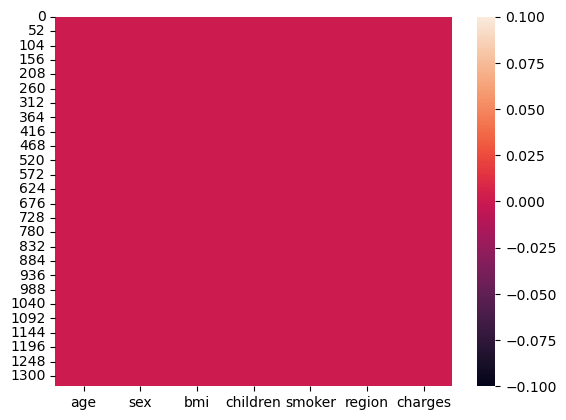

In [15]:
sns.heatmap(df.isnull())

In [16]:
df=df.drop_duplicates()
print("Rows and columns after droping duplicate:",df.shape)

Rows and columns after droping duplicate: (1337, 7)


In [17]:
df.drop(["sex"],axis=1,inplace=True)
df.head()

,age,bmi,children,smoker,region,charges
0,19,27.900,0,yes,southwest,16884.92400
1,18,33.770,1,no,southeast,1725.55230
2,28,33.000,3,no,southeast,4449.46200
3,33,22.705,0,no,northwest,21984.47061
4,32,28.880,0,no,northwest,3866.85520


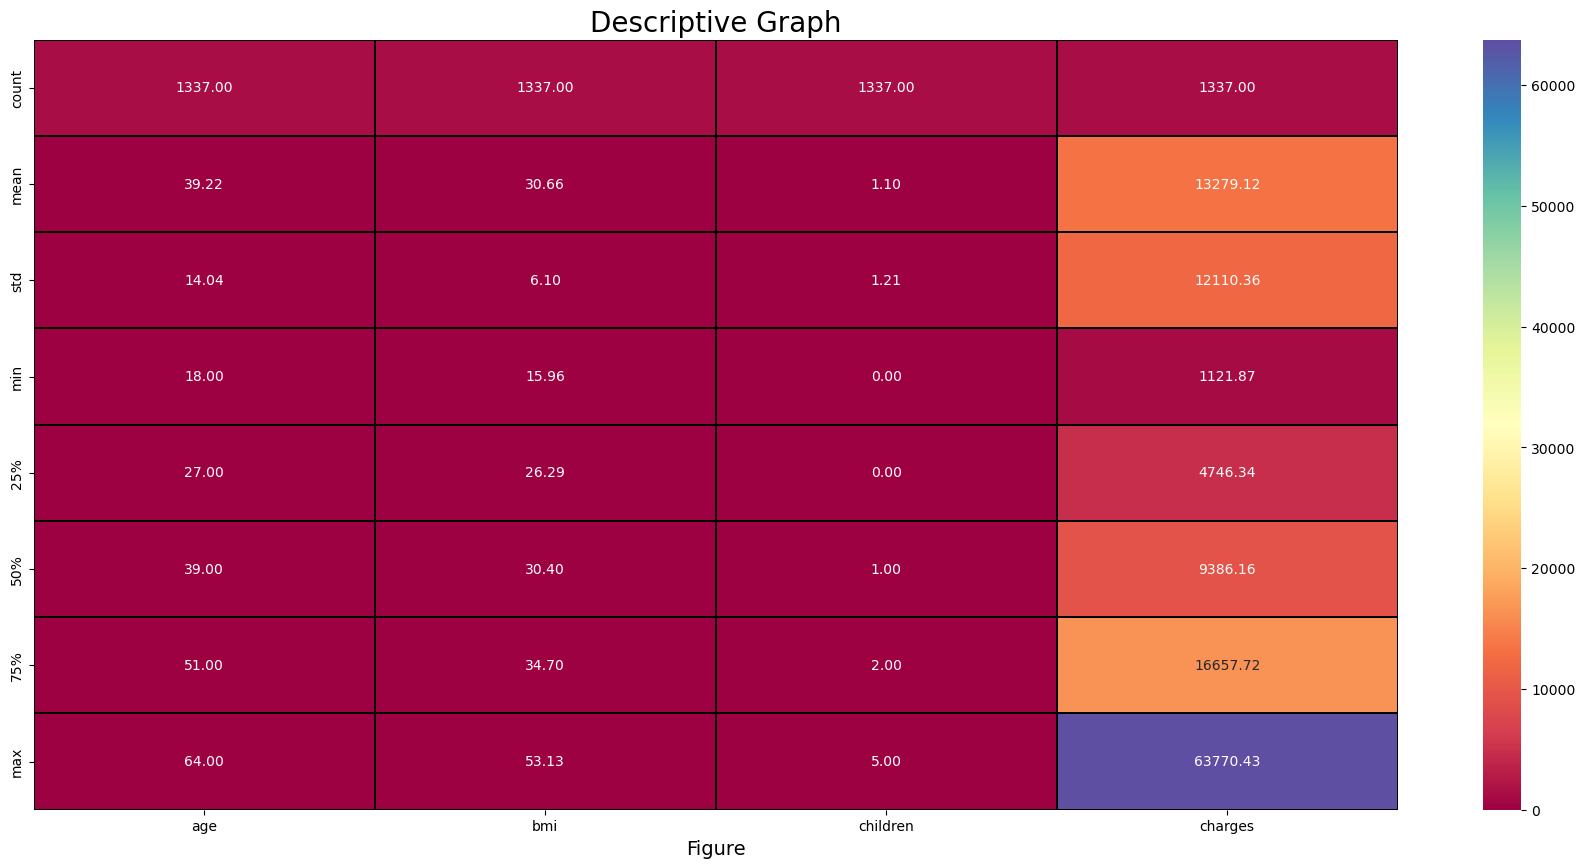

In [18]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

In [20]:
categorical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="O":
        categorical_cols.append(x)
print(f"object data type columns are:\n",categorical_cols)

numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="float64" or df.dtypes[x]=="int64":
        numerical_cols.append(x)
print(f"\nNumber Data Types Columns are:\n",numerical_cols)

object data type columns are:
 ['smoker', 'region']

Number Data Types Columns are:
 ['age', 'bmi', 'children', 'charges']


In [21]:
np.mean(df["charges"])

13279.121486655948

In [22]:
df["charges"].isnull().sum()

0

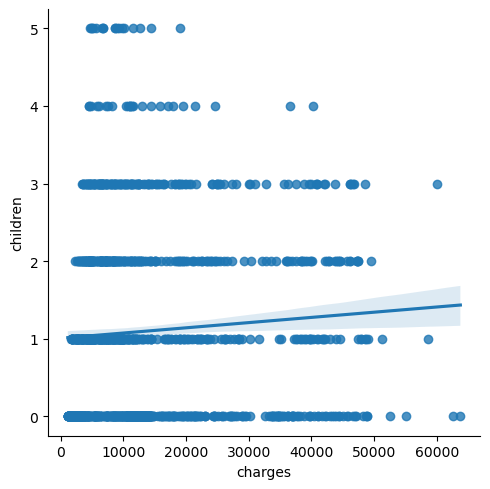

In [23]:
import seaborn as sns
sns.lmplot(x="charges",y="children",data=df,palette="colorblind")

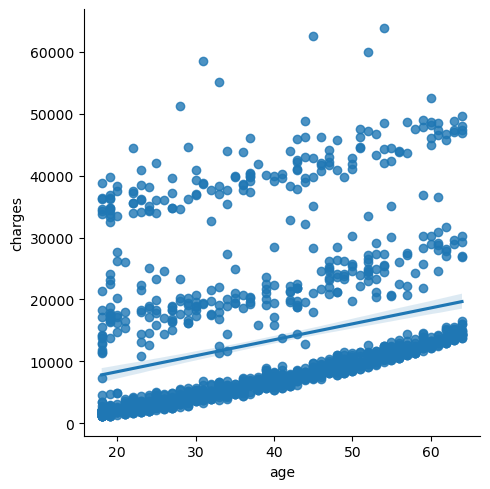

In [24]:
sns.lmplot(x="age",y="charges",data=df,palette="colorblind")

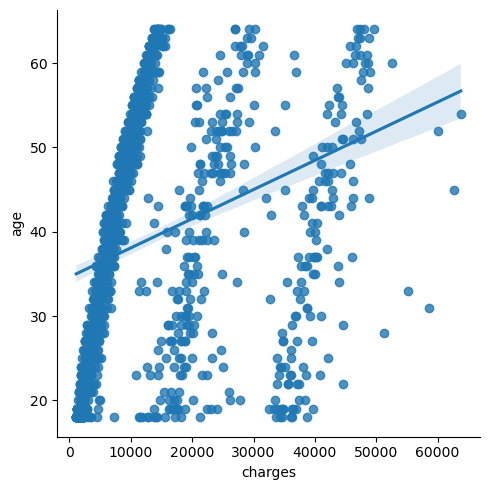

In [25]:
sns.lmplot(x="charges",y="age",data=df,palette="colorblind")

0.28391419385321137


<Axes: xlabel='bmi', ylabel='Density'>

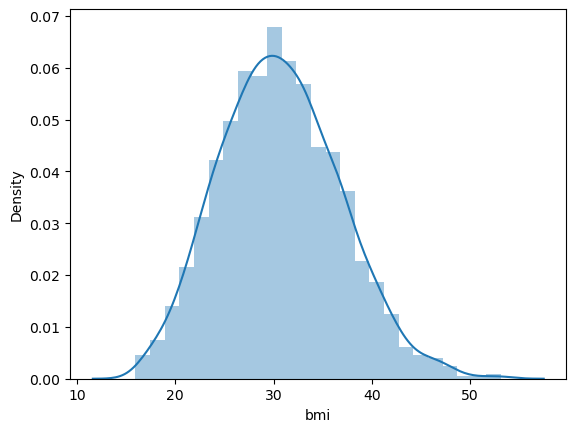

In [30]:
print(df["bmi"].skew())
sns.distplot(df["bmi"],kde=True)

1.5153909108403483


<Axes: xlabel='charges', ylabel='Density'>

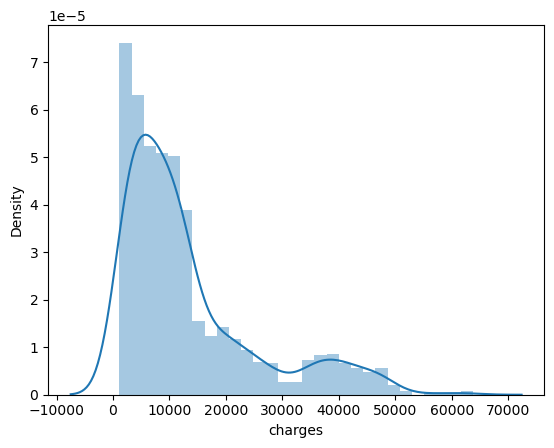

In [33]:
print(df["charges"].skew())
sns.distplot(df["charges"],kde=True)

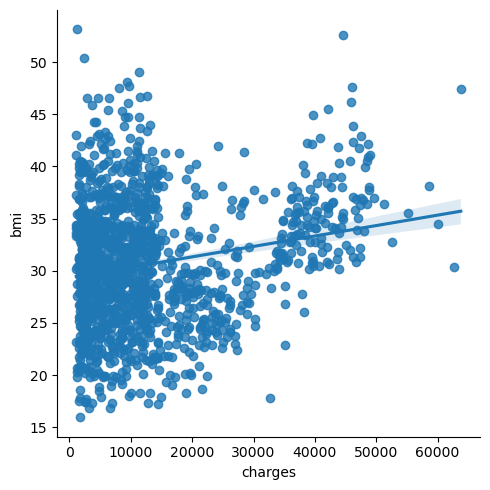

In [35]:
sns.lmplot(x="charges",y="bmi",data=df,palette="colorblind")

<Axes: xlabel='bmi', ylabel='charges'>

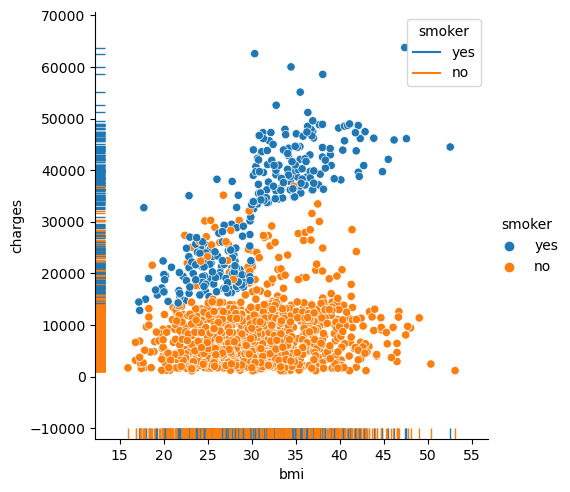

In [38]:
sns.relplot(data=df,x="bmi",y="charges",hue="smoker")
sns.rugplot(data=df,x="bmi",y="charges",hue="smoker",)

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [40]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,3,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,1,21984.47061
4,32,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,0,1,10600.54830
1334,18,31.920,0,0,0,2205.98080
1335,18,36.850,0,0,2,1629.83350
1336,21,25.800,0,0,3,2007.94500


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   bmi       1337 non-null   float64
 2   children  1337 non-null   int64  
 3   smoker    1337 non-null   int32  
 4   region    1337 non-null   int32  
 5   charges   1337 non-null   float64
dtypes: float64(2), int32(2), int64(2)
memory usage: 95.0 KB


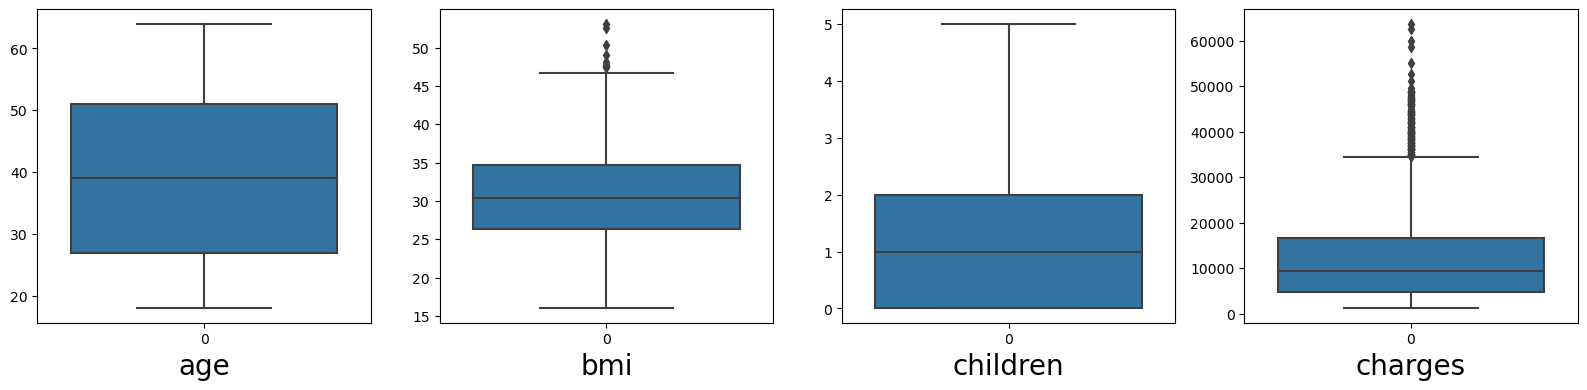

In [42]:
plt.figure(figsize=(20,15),facecolor="white")
plot_number=1
for column in df[numerical_cols]:
    if plot_number<=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_number +=1
plt.tight_layout()

In [43]:
df.skew()

age         0.054781
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

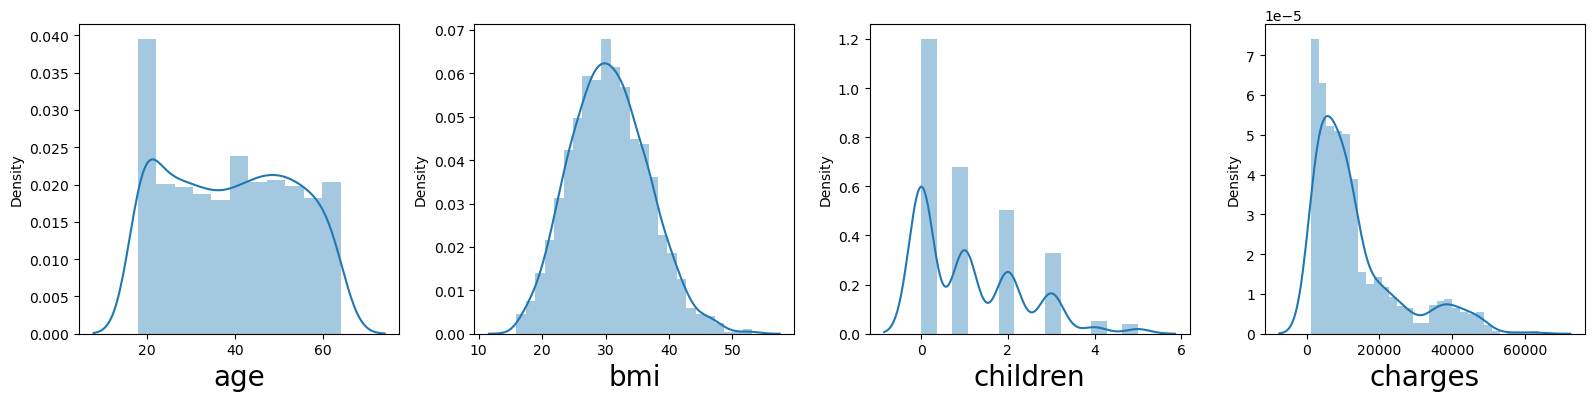

In [44]:
plt.figure(figsize=(20,15),facecolor="white")
plot_number=1
for column in df[numerical_cols]:
    if plot_number<=20:
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_number +=1
plt.tight_layout()

In [45]:
df.corr()

,age,bmi,children,smoker,region,charges
age,1.000000,0.109344,0.041536,-0.025587,0.001626,0.298308
bmi,0.109344,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.198401,0.067389,0.787234,-0.006547,1.000000


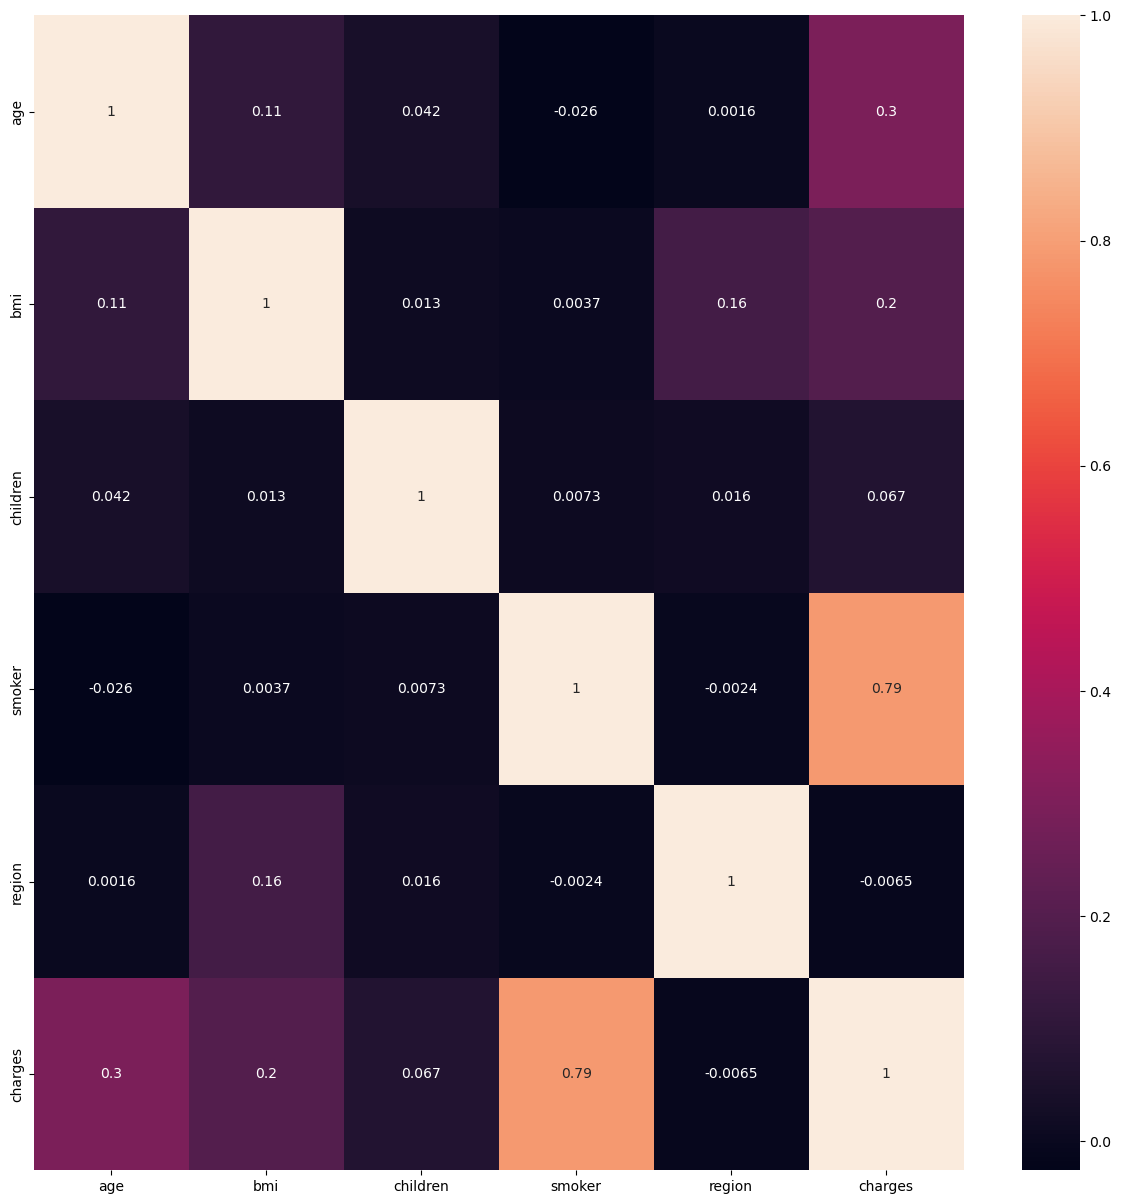

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [48]:
x=df.drop("region",axis=1)
y=df["region"]

In [49]:
y.value_counts()

2    364
3    325
1    324
0    324
Name: region, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
sm=SMOTE()

In [52]:
x,y=sm.fit_resample(x,y)

In [53]:
y.value_counts()

3    364
2    364
1    364
0    364
Name: region, dtype: int64

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
print("Best score:",maxAcc)
print("Random State:",rs)

Best score: 0.34553775743707094
Random State: 176


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=409)

In [62]:
print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of x_train :",y_train.shape)
print("Size of x_train :",y_test.shape)

Size of x_train : (1019, 5)
Size of x_test : (437, 5)
Size of x_train : (1019,)
Size of x_train : (437,)


In [86]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=500)
    
    #training the model
    clf.fit(x_train,y_train)
    
    #predicting Y_Test
    pred=clf.predict(x_test)
    
    #Accuracy Score
    acc_score =(accuracy_score(y_test,pred))
    print ("Accuracy Score:",acc_score)

In [87]:
clf=LogisticRegression()
classify(clf,x,y)

Accuracy Score: 0.3424657534246575


In [88]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.3801369863013699


In [89]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.3561643835616438


In [90]:
clf=SVC()
classify(clf,x,y)

Accuracy Score: 0.2876712328767123


In [91]:
clf=KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.3013698630136986


In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [96]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred))

Accuracy Score: 0.35697940503432496


In [98]:
import pickle

In [99]:
filename="Medical Cost Personal Insurance Project.pkl"

In [100]:
pickle.dump(rf,open(filename,"wb"))

In [101]:
loaded_model=pickle.load(open("Medical Cost Personal Insurance Project.pkl","rb"))
result=loaded_model.score(x_test,y_test)
print(result*100)

35.6979405034325


In [102]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Origional"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,436
Predicted,1,3,3,1,0,2,0,0,0,3,...,1,1,2,2,2,2,2,3,3,2
Origional,1,3,3,1,0,2,0,0,0,3,...,1,1,2,2,2,2,2,3,3,2
